<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de países

Crear un modelo de segmentación para la clasificación de paises por categoría (desarrollado, en desarrollo, subdesarollado) según sus datos a nivel macro<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Country-data.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv > Country-data.csv
    else:
        !wget Country-data.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv

--2023-03-22 01:20:02--  http://country-data.csv/
Resolving country-data.csv (country-data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘country-data.csv’
--2023-03-22 01:20:02--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9229 (9.0K) [text/plain]
Saving to: ‘Country-data.csv’

Country-data.csv    100%[===================>]   9.01K  --.-KB/s    in 0s      

2023-03-22 01:20:02 (69.6 MB/s) - ‘Country-data.csv’ saved [9229/9229]

FINISHED --2023-03-22 01:20:02--
Total wall clock time: 0.2s
Downloaded: 1 files, 9.0K in 0s (69.6 MB/s)


### `Country-data.csv`:
El dataset **`Country-data.csv`** contiene datos a nivel macroeconomía, ingresos y poblacional sobre países del mundo para su segmentación.<br>
[Dataset source](Country-data.csvn)
- **country** --> nombre del país
- **child_mort** --> cuantos niños menores a 5 años mueren de cada 1000
- **exports** --> exportación de bienes y servicios per cápita
- **health** --> inversiones en salud per cápita
- **import** --> importación de bienes y servicios per cápita
- **Income** --> ingresos por persona (neto)
- **Inflation** --> inflación anual
- **life_expec** --> Promedio de expectativa de vida
- **total_fer** --> Cuantos niños por pareja hay en promedio
- **gdpp** --> Producto bruto interno per cápita

In [3]:
df = pd.read_csv("Country-data.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 167


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

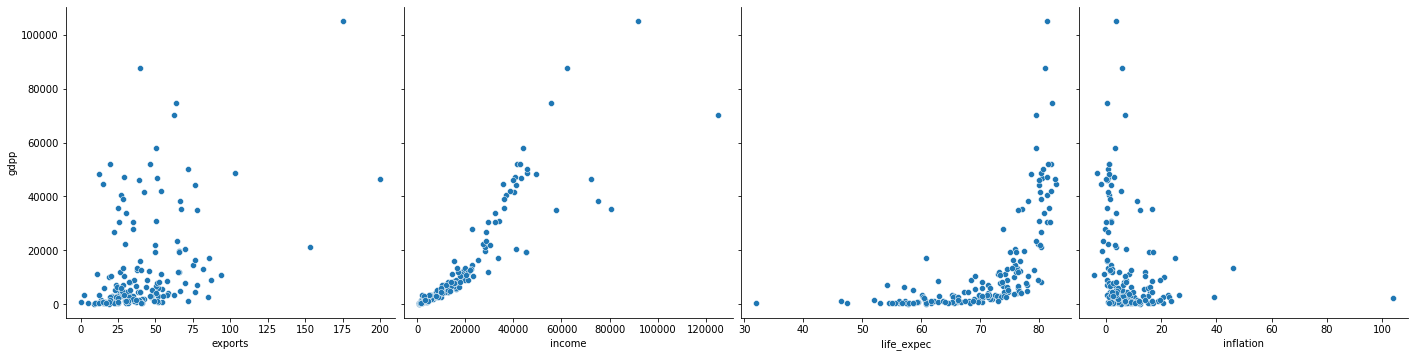

In [7]:
# Observar todas las relaciones entre el feature del producto bruto interno
# y los siguientes features
# Utilizar pairplot con y_vars=['gdpp']
# Utilizar pairplot con x_vars=['exports', 'income', 'life_expec', 'inflation']
# Recordar desactivar la diagonal(diag_kind=None,)

pp = sns.pairplot(data=df, x_vars=['exports', 'income', 'life_expec', 'inflation'], y_vars=['gdpp'], diag_kind=None, height=5)
plt.show()


Deberían observar que a medida que aumenta el producto bruto interno aumenta la exportación, el ingreso por persona (incoma), la expectativa de vida (life_expec) y baja la inflación (inflation). Este parámetro lo debe utilizar luego para determinar si los paises segmentados son:
- desarrollados
- en_desarrollo
- subdesarrollados

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [8]:
# Almuno: Crear un numpy array "X" con los features de entrada expecto el nombre del pais (country)
X = df.drop("country", axis=1).values

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [9]:
# Almuno: Entrenar un modelo de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_model(X, max_clusters=10):

    n_clusters = list(range(2, max_clusters+1)) 
    ensayos = len(n_clusters)                  


    array_error = np.zeros((ensayos))
    array_score = np.zeros((ensayos))

    for i in range(ensayos): ## --> ensayos = 9
       
        kmeans = KMeans(n_clusters=n_clusters[i], init="k-means++", random_state=0)
        kmeans.fit(X)
        array_error[i] = kmeans.inertia_
        array_score[i] = silhouette_score(X, kmeans.labels_)

    return array_error, array_score, n_clusters

In [11]:
# Invocamos la función find_best_model, pasándole los valores de X
array_error, array_score, n_clusters = find_best_model(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [12]:
# Dibujar la evolucion del error (inertia) y deteminar el 
# punto de quiebre (elbow point)

def graficar_punto_codo(array_error, array_score, n_clusters):
 
  fig = plt.figure()
  ax = fig.add_subplot()

  
  ax.plot(n_clusters, array_error/array_error.max(), label='error') 
  ax.plot(n_clusters, array_score, label='score')
  ax.grid('dashed')
  ax.legend()
  plt.show()

  best_cluster = n_clusters[array_score.argmax()]
  print('El mejor resultado segun la métrica se consigue con clusters=', best_cluster)

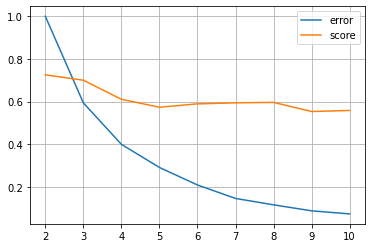

El mejor resultado segun la métrica se consigue con clusters= 2


In [13]:
graficar_punto_codo(array_error, array_score, n_clusters)

Se puede observar que el punto de elbow podría ser con cluster=4, pero ya sabemos de ante mano que queremos dividir el dataset en 3 grupos, utilizaremos n_clusters=3

In [14]:
# Alumno: Entrenar el modelo con el mejor n_clusters=3
# y determinar los labels

kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Alumno: Sumar la columna de labels con el nombre de countryseg (customer segmentation)
# a su dataset
df['countryseg'] = labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [17]:
# Alumno: Calcular la exactitud (accuracy) del modelo
from sklearn.metrics import silhouette_score
silhouette_score (X, kmeans.labels_)

0.7003508054481694

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

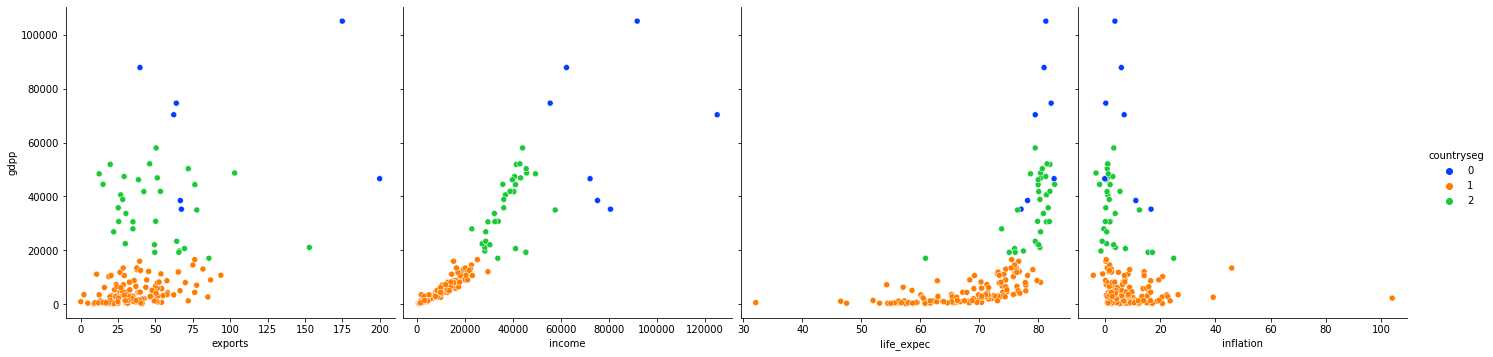

In [19]:
# Alumno: Volver a repetir el gráfico de pairplot que realizó antes
# con ['exports', 'income', 'life_expec', 'inflation']
# pero ahora utilizando para hue la columna countryseg

pp = sns.pairplot(data=df, x_vars=['exports', 'income', 'life_expec', 'inflation'], y_vars=['gdpp'], hue='countryseg', palette='bright', diag_kind=None, height=5)
plt.show()

In [29]:
df.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg,countrycat
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,subdesarrollado
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,subdesarrollado
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,subdesarrollado
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,subdesarrollado
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,subdesarrollado
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1,subdesarrollado
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,subdesarrollado
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,desarrollandose
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,desarrollandose
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,subdesarrollado


In [23]:
# Alumno: viendo los gráficos, principalmente el de ingresos (income), deteminar
# la categoría de cada cluster y colocarla en una columna countrycat.
# Utilizar lambda expresion en función de countryseg para crear
# esa nueva coulmna
# - desarrollado
# - desarrollandose
# - subdesarrollado

df['countrycat'] = df.apply(lambda x: 'desarrollado' if x.countryseg == 0 else 'subdesarrollado' if x.countryseg == 1 else 'desarrollandose', axis=1)


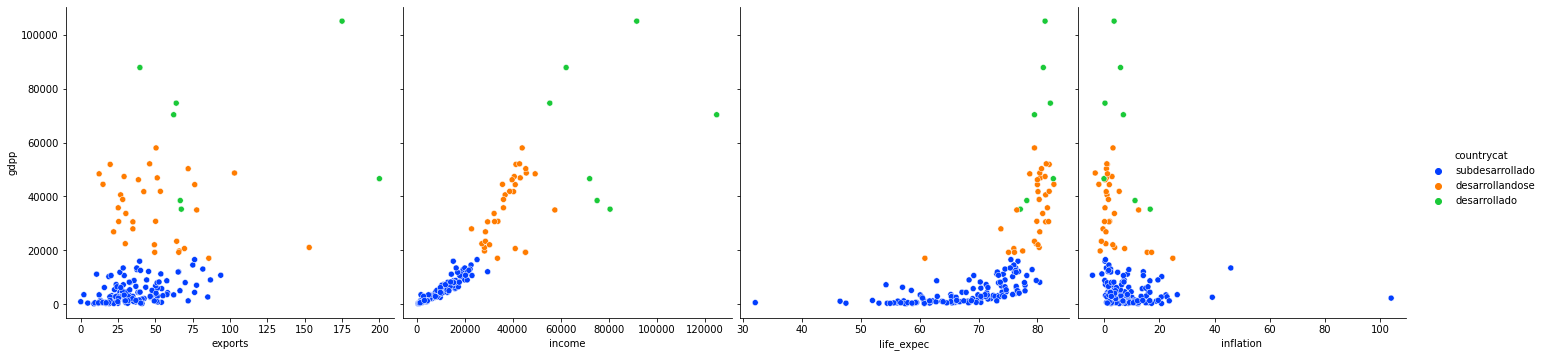

In [27]:
# Alumno: volver a graficar el gráfico anterior pero ahora usando en 
# en hue = 'countrycat'

pp = sns.pairplot(data=df, x_vars=['exports', 'income', 'life_expec', 'inflation'], y_vars=['gdpp'], hue='countrycat', palette='bright', diag_kind=None, height=5)
plt.show()

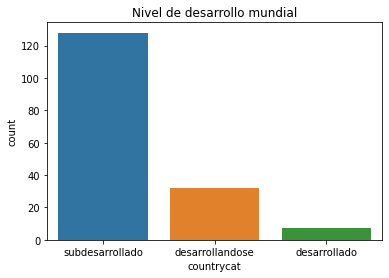

In [28]:
# Alumno: Determinar cuantas países hay en cada categoría
# utilizando el gráfico de seaborn countplot en la columna countrycat

sns.countplot(x='countrycat', data=df).set_title("Nivel de desarrollo mundial")
plt.show()


Bueno ahora a jugar! Ahora puede buscar en su dataset algún país en general y ver su categoría según el modelo que armó

In [47]:
país_analizar = "Argentina"
df_pais = df[df['country'] == país_analizar]
df_pais.reset_index(inplace=True)

#print(df_pais["countrycat"])
df_pais
print("La categoria del país",país_analizar,"es",df_pais["countrycat"][0])

La categoria del país Argentina es subdesarrollado


# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">